# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [11]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [13]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [14]:
df['sales_channel']=df['sales_channel'].map({'Mobile':0,'Internet':1})

In [16]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [18]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [22]:
df['trip_type']=df['trip_type'].map({'OneWay':0,'RoundTrip':1,'CircleTrip':2})

In [24]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [27]:
lst_route=df['route'].value_counts().head(9).index

In [30]:
df['route']=df['route'].apply(lambda x:'Others' if x not in lst_route else x)

In [41]:
df['route'].value_counts()

Others    41314
AKLKUL     2680
PENTPE      924
MELSGN      842
ICNSIN      801
DMKKIX      744
ICNSYD      695
DMKPER      679
DPSICN      666
DMKOOL      655
Name: route, dtype: int64

In [42]:
df['route']=df['route'].map({'Others':0, 'AKLKUL':1, 'PENTPE':2, 'MELSGN':3, 'ICNSIN':4, 'DMKKIX':5, 'ICNSYD':6,
       'DMKPER':7, 'DPSICN':8, 'DMKOOL':9})

In [43]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,0,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,0,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,0,India,1,0,1,5.52,0


In [50]:
lst_country=df.booking_origin.value_counts().head(9).index

In [51]:
df['booking_origin']=df['booking_origin'].apply(lambda x:'Others' if x not in lst_country else x)

In [56]:
ohe=pd.get_dummies(df['booking_origin'],prefix='booking_origin')
df=pd.concat([df,ohe],axis=1)

In [58]:
df=df.drop('booking_origin',axis=1)

In [59]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,...,booking_origin_Australia,booking_origin_China,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_Others,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,2,1,1,262,19,7,6,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,112,20,3,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,1,243,22,17,3,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,96,31,4,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1,1,68,22,15,3,0,1,0,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

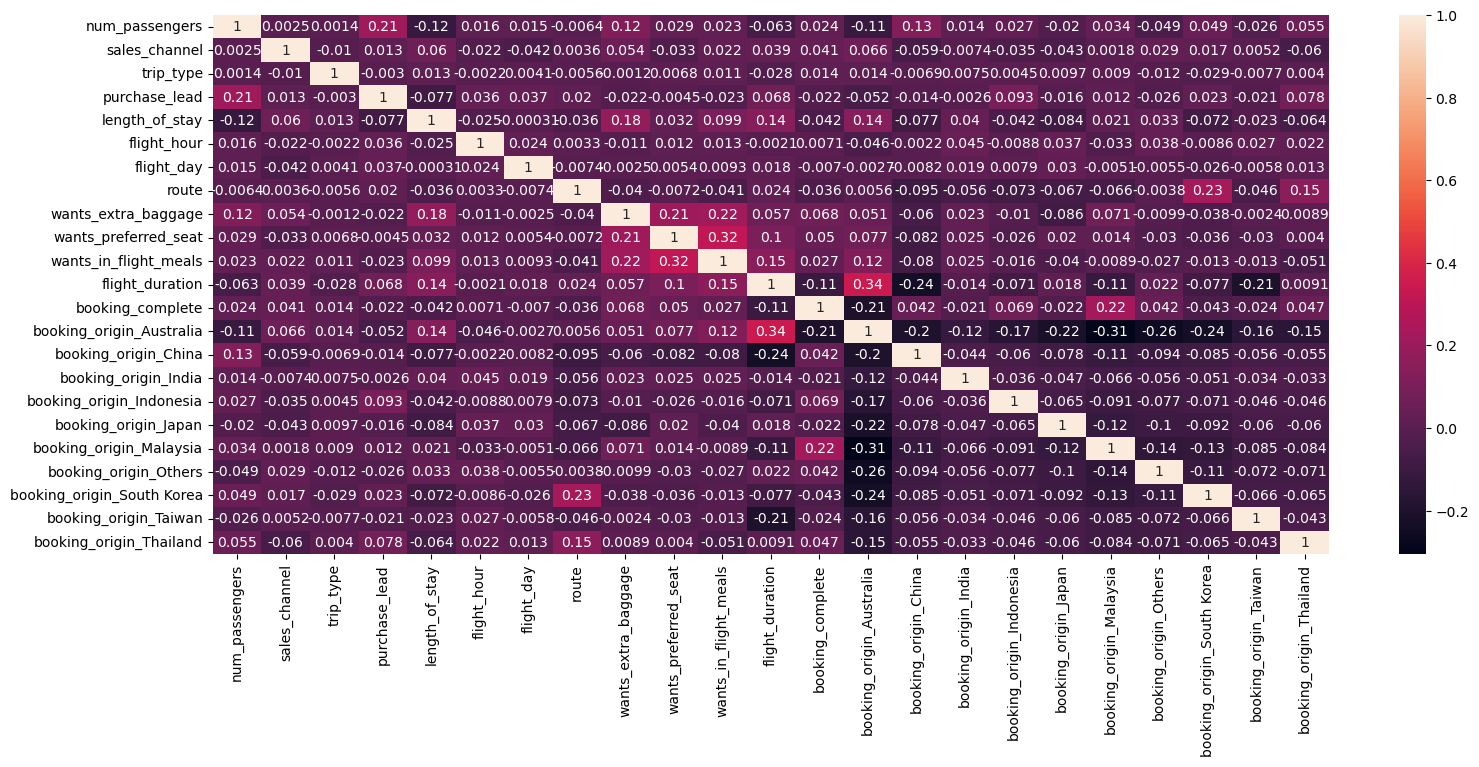

In [69]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True)

C:\Users\elcot\AppData\Local\Temp\ipykernel_7896\2046296209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['flight_hour'])


<Axes: xlabel='flight_hour', ylabel='Density'>

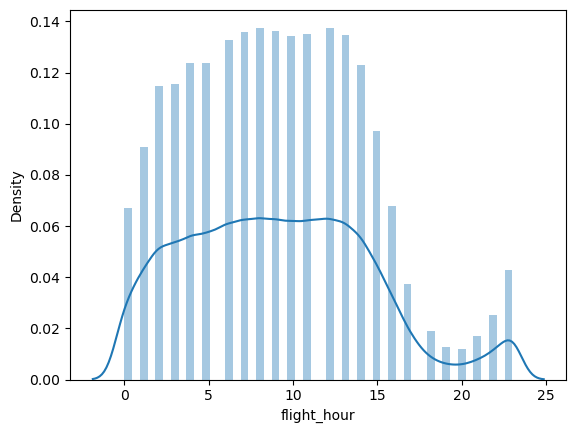

In [77]:
sns.distplot(df['flight_hour'])

<Axes: >

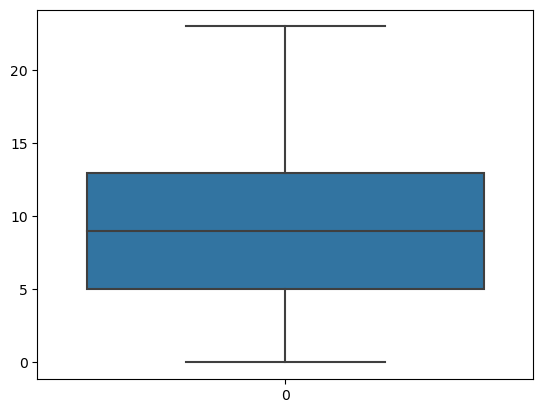

In [89]:
sns.boxplot(df['flight_hour'])

C:\Users\elcot\AppData\Local\Temp\ipykernel_7896\3225561888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length_of_stay'])


<Axes: xlabel='length_of_stay', ylabel='Density'>

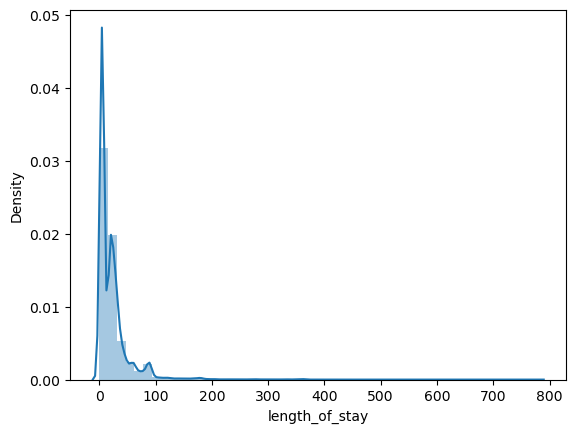

In [76]:
sns.distplot(df['length_of_stay'])

<Axes: >

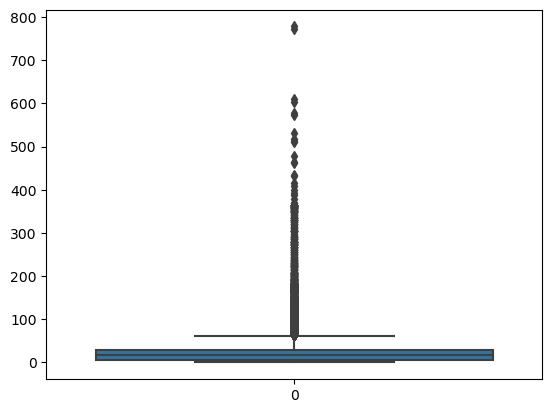

In [85]:
sns.boxplot(df['length_of_stay'])

In [99]:
df = df.loc[~(df['length_of_stay'] > 50)]


<Axes: >

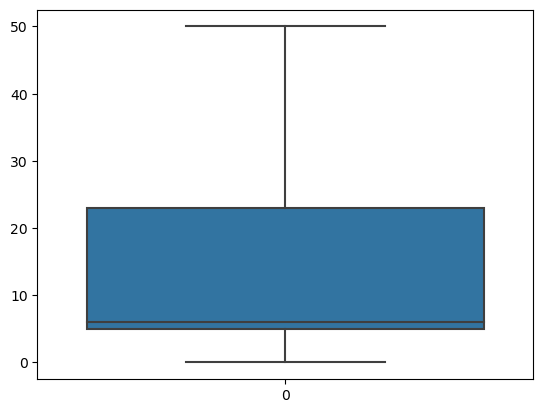

In [100]:
sns.boxplot(df['length_of_stay'])

C:\Users\elcot\AppData\Local\Temp\ipykernel_7896\1154048431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['purchase_lead'])


<Axes: xlabel='purchase_lead', ylabel='Density'>

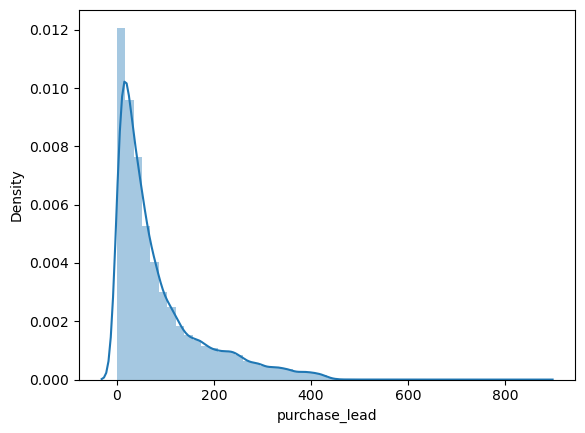

In [79]:
sns.distplot(df['purchase_lead'])

<Axes: >

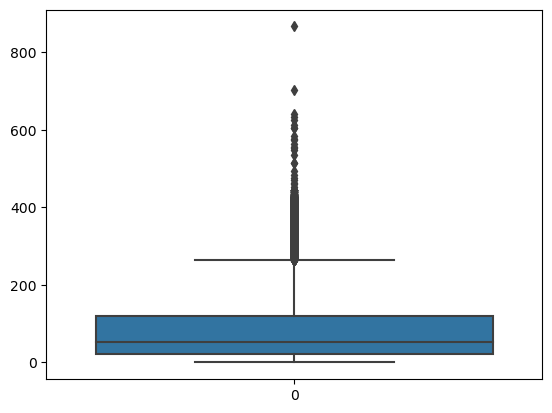

In [101]:
sns.boxplot(df['purchase_lead'])

In [107]:
df=df[df['purchase_lead']<230]

C:\Users\elcot\AppData\Local\Temp\ipykernel_7896\1154048431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['purchase_lead'])


<Axes: xlabel='purchase_lead', ylabel='Density'>

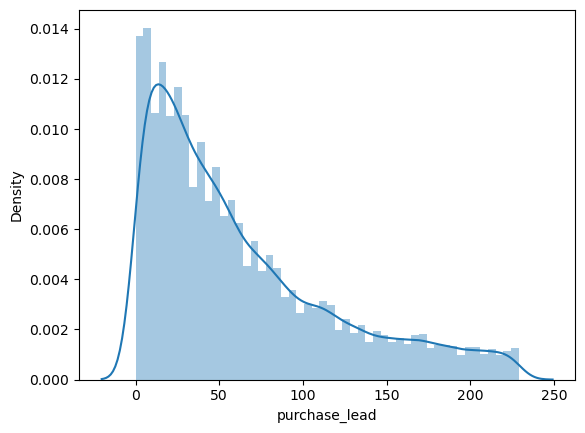

In [109]:
sns.distplot(df['purchase_lead'])

In [110]:
df['booking_complete'].value_counts()

0    34256
1     6074
Name: booking_complete, dtype: int64

In [128]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x=df.drop('booking_complete',axis=1)
y=df['booking_complete']

sampling=SMOTE(sampling_strategy=0.75,random_state=48)
x_sampled,y_sampled=sampling.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,stratify=y_sampled,test_size=0.25)

In [129]:
y_train.value_counts()

0    25692
1    19269
Name: booking_complete, dtype: int64

In [154]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [155]:
y_pred=classifier.predict(x_test)

In [156]:
y_pred_train=classifier.predict(x_train)

In [157]:
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score,confusion_matrix

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.7776804712232084
0.7843102911412112


In [146]:
from xgboost import XGBClassifier

xgb=XGBClassifier()

xgb.fit(x_train,y_train)
print(roc_auc_score(y_test,xgb.predict(x_test)))
print(roc_auc_score(y_train,xgb.predict(x_train)))

0.8616495407130624
0.889265140899891


In [151]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [152]:
for lr in ([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]):
    model=XGBClassifier(learning_rate=lr,n_estimators=100,verbosity=0)
    model.fit(x_train,y_train)
    print("learing rate:",lr,"Train score:",model.score(x_train,y_train),"CV score:",np.mean(cross_val_score(model,x_train,y_train,cv=10)))

learing rate: 0.01 Train score: 0.810257778963991 CV score: 0.8096128439125492
learing rate: 0.02 Train score: 0.8306977157981361 CV score: 0.8230244144574043
learing rate: 0.03 Train score: 0.8379706857053891 CV score: 0.8315429542985161
learing rate: 0.04 Train score: 0.8419074308845443 CV score: 0.8353907102560267
learing rate: 0.05 Train score: 0.8435310602522186 CV score: 0.8382154186223001
learing rate: 0.06 Train score: 0.8498698872356042 CV score: 0.8403950399515058
learing rate: 0.07 Train score: 0.8529836969818287 CV score: 0.8437090078636844
learing rate: 0.08 Train score: 0.8566313026845488 CV score: 0.8476457219008007
learing rate: 0.09 Train score: 0.8629256466715598 CV score: 0.850759571228585
learing rate: 0.1 Train score: 0.8646604835301706 CV score: 0.8534062892462115
learing rate: 0.11 Train score: 0.8679522252618936 CV score: 0.8554080191460184
learing rate: 0.12 Train score: 0.8710660350081182 CV score: 0.8568759263787562
learing rate: 0.13 Train score: 0.872066902

In [197]:
xgb=XGBClassifier(learning_rate=0.27)

xgb.fit(x_train,y_train)
print(roc_auc_score(y_test,xgb.predict(x_test)))
print(roc_auc_score(y_train,xgb.predict(x_train)))

0.8612213918729567
0.8850939332606776


In [198]:
confusion_matrix(y_test,xgb.predict(x_test))

array([[8131,  433],
       [1458, 4965]], dtype=int64)

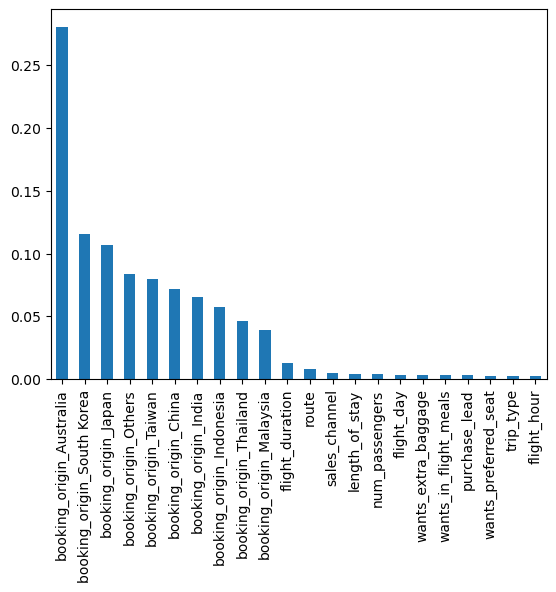

In [203]:
feature_im=pd.Series(data=xgb.feature_importances_,index=['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_origin_Australia',
       'booking_origin_China', 'booking_origin_India',
       'booking_origin_Indonesia', 'booking_origin_Japan',
       'booking_origin_Malaysia', 'booking_origin_Others',
       'booking_origin_South Korea', 'booking_origin_Taiwan',
       'booking_origin_Thailand'])
feature=feature_im.sort_values(ascending=False).plot.bar()

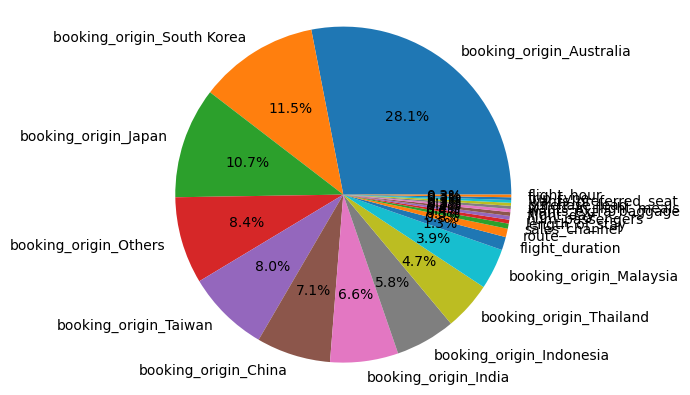

In [204]:
feature_im_sorted = feature_im.sort_values(ascending=False)
feature_im_sorted.plot.pie(autopct='%1.1f%%')

# Set the aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the pie chart
plt.show()

In [206]:
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8564
           1       0.92      0.77      0.84      6423

    accuracy                           0.87     14987
   macro avg       0.88      0.86      0.87     14987
weighted avg       0.88      0.87      0.87     14987

